# James O. Thomas
# HW Set 5 - Computational Physics 
## updated to include analytical solution to problem 1 
## and clipping of arrays to keep only above ground data points
## Due Oct 1, 2015
---


In [4]:
%matplotlib inline

In [11]:
%matplotlib

Using matplotlib backend: Qt4Agg


**Problem 1: Terminal Velocity**

When jumping from an airplane, you will most often have a parachute to slow your fall.  Here let's consider a very simple example in which the frictional drag force is linearly dependent on the velocity:

$$
\frac{dv}{dt} = a - bv
$$

where $a$ and $b$ are constants.  In our case $a$ corresponds to the acceleration due to gravity, and $b$ is a constant from drag.  Note that the drag force is negative, indicating it opposes the motion.  Use the Euler method to solve for $v$ as a function of time and plot your results.  A convenient choice of parameters is $a=10$ and $b=1$.  You should find that $v$ approaches a constant value at long times: this is the terminal velocity.   If you open your chute immediately after jumping from the plane, you will have $v_{\rm initial}\sim1$ m/s, but if you wait a minute or so, you will have $v_{\rm initial}\sim50$  m/s.  Plot both $v(t)$ curves on the same plot with a legend.

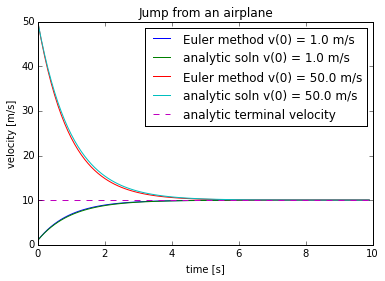

In [3]:
# Solution to problem 1
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

a = 10.
b = 1.
dt = 0.1
nsteps = 100

t = np.arange(0,nsteps*dt,dt)
term = t*0 + 10.0       # the analytic terminal velocity
v = np.zeros(nsteps)
v_init = [1, 50]

plt.figure()

for v_0 in v_init:
    v_analytic = a/b + (v_0 - a/b)*np.exp(-b*t) # given DE is linear in v
    v[0] = v_0
    for i in range(nsteps - 1):
        v[i+1] = v[i]+(a-b*v[i])*dt
    plt.plot(t,v, label = 'Euler method v(0) = '+str(v[0])+' m/s')
    plt.plot(t,v_analytic, label = 'analytic soln v(0) = '+str(v[0])+' m/s')
    

plt.plot(t,term, '--', label = 'analytic terminal velocity')
plt.legend()
plt.title('Jump from an airplane')
plt.xlabel('time [s]')
plt.ylabel('velocity [m/s]')
plt.show()

The analytic solution is found by:

$$ \frac{dv}{dt} = a - bv$$

$$ \frac{dv}{dt} + bv = a $$

which is linear in v. Find the integration constant:

$$ \mu = e^{ \left( \int bdt \right) } = e^{bt} $$

multiplying the DE by $\mu $

\begin{align}
e^{bt} \frac{dv}{dt} + e^{bt}bv &= ae^{bt} \\
\frac{d}{dt} \left( e^{bt}v \right) &= ae^{bt} \\
d \left( e^{bt} v \right) &= ae^{bt}dt \\
e^{bt}v &= \frac{a}{b}e^{bt} + C \\
v(t) &= \frac{a}{b} + Ce^{-bt} 
\end{align}

Solve for $C$ using the initial condition of $v(0) = v_{initial}$ to get:

$$C = v_{initial} - \frac{a}{b}$$

plugging this in we finally get:

$$v(t) = \frac{a}{b} + \left( v_{initial} - \frac{a}{b} \right) e^{-bt}$$

The terminal velocity is found by analyzing the analytic solution as $t \to \infty $

$$v(t \to \infty ) = \frac{a}{b} + \left( v_{initial} - \frac{a}{b} \right) e^{-b  ( \infty )}$$

since the exponential term goes to 0 we just have

$$v(t \to \infty ) = \frac{a}{b} = \frac{10}{1} = 10 $$

which matches the computed results well.

---


**Problem 2: Coupled Radioactive Decay**

Consider a radioactive decay problem involving two types of nuclei
$A$ and $B$ with populations $N_A(t)$ and $N_B(t)$.  Suppose that type $A$ nuclei
decay to form type $B$ nuclei, when then also decay according to

\begin{align}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A}\\
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}
\end{align}

where $\tau_A$ and $\tau_B$ are the decay time constants for each time of nucleus.  Use the Euler method to solve these coupled equations for $N_A$ and $N_B$ as functions of time.  Explore the behavior found for different values of the ratio $\tau_A/\tau_B$.  

** Derivation of Analytical Solution **

We start with the first $DE$.

\begin{align}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A}\\
\frac{dN_A}{N_A} &= -\frac{dt}{\tau_A}\\
ln(N_A) &= -\frac{t}{\tau_A} + C\\
N_A(t) &= Ce^{-t/\tau_A}\\
N_A(t) &= N_0e^{-t/\tau_A}
\end{align}

where the last step was found using the initial condition of $N_A(0) = N_0$.

Now for the 2nd $DE$. First we consider the case where $\tau_A \neq \tau_B$

\begin{align}
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}\\
\frac{dN_B}{dt} &= \frac{N_0}{\tau_A}e^{-t/\tau_A} - \frac{N_B}{\tau_B}\\
\frac{dN_B}{dt} + \frac{1}{\tau_B}N_B &= \frac{N_0}{\tau_A}e^{-t/\tau_A}
\end{align}

which is linear in $N_B$. We find the integrating factor $\mu = exp(\int 1/\tau_B dt) = exp(t/\tau_B) $ and multiply throughout.

\begin{align}
e^{t/\tau_B}\frac{dN_B}{dt} + \frac{1}{\tau_B}e^{t/\tau_B}N_B &= N_0 \frac{1}{\tau_A}e^{t(1/\tau_B - 1/\tau_A)}\\
d \left( e^{t/\tau_B}N_B \right) &= \frac{N_0}{\tau_A} \int e^{t(1/\tau_B - 1/\tau_A)} dt\\
e^{t/\tau_B}N_B &= \frac{N_0}{\tau_A} \frac{1}{1/\tau_B - 1/\tau_A}e^{t(1/\tau_B - 1/\tau_A)} + C\\
N_B &= \frac{N_0}{\tau_A} \left( \frac{1}{1/\tau_B - 1/\tau_A} \right) e^{-t/\tau_A} + Ce^{-t/\tau_B}
\end{align}

We solve for $C$ using the initial condition of $N_B(0) = 0$ and get:

$$C = - \frac{N_0}{\tau_A} \left( \frac{1}{1/\tau_B - 1/\tau_A} \right) $$

plugging this in and factoring out common terms, we finally get

$$N_B(t) = \frac{N_0}{\tau_A} \left( \frac{1}{1/\tau_B - 1/\tau_A} \right) \left( e^{-t/\tau_A} - e^{-t/\tau_B} \right)$$

Now we have to consider the case where $\tau_A = \tau_B \equiv \tau $

\begin{align}
\frac{dN_B}{dt} &= \frac{N_A}{\tau} - \frac{N_B}{\tau} \\
\frac{dN_B}{dt} &= \frac{N_0}{\tau} e^{-t/\tau} - \frac{N_B}{\tau} \\
\frac{dN_B}{dt} + \frac{N_B}{\tau} &= \frac{N_0}{\tau}e^{-t/\tau}
\end{align}

which is linear in $N_B$. We find the integrating factor again as $\mu = exp(\int 1/\tau dt) = exp(t/\tau )$ and multiply throughout

\begin{align}
e^{t/\tau}\frac{N_B}{dt} + e^{t/\tau } \frac{N_B}{\tau } &= e^{t/\tau} \frac{N_0}{\tau } e^{-t/\tau } \\
d \left( e^{t/\tau } N_B \right) &= \frac{N_0}{\tau} dt \\
e^{t/\tau} N_B &= \frac{N_0}{\tau}t + C \\
N_B &= \frac{N_0}{\tau}te^{-t/\tau} + Ce^{-t/\tau}
\end{align}

plugging in the initial condition of $N_B(0) = 0$ and solving for $C$ we get $C = 0$. Thus

$$N_B(t) = \frac{N_0}{\tau}te^{-t/\tau}$$

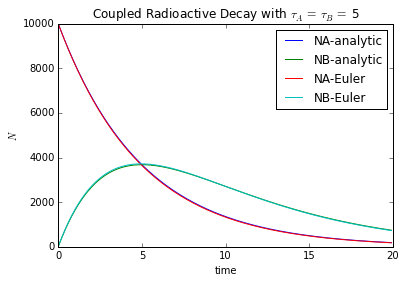

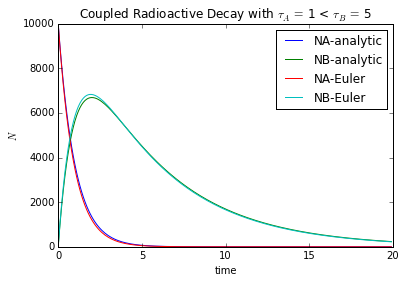

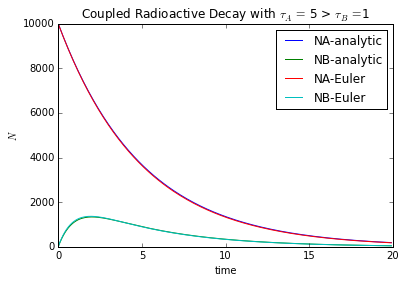

In [5]:
# Solution to problem 2
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt

def analyticNA(tA, t):
    return N_0*np.exp(-t/tA)

def analyticNB(tA, tB, t):
    if tA != tB:
        return N_0/tA*(1/(1/tB-1/tA))*(np.exp(-t/tA)-np.exp(-t/tB))
    else:
        return N_0/tA*t*np.exp(-t/tA)

dt = 0.1
nsteps = 200
N_0 = 1.0e4   # initial number of nuclei


A = [5, 1, 5]       # time constant for type A
B = [5, 5, 1]       # time constant for type B

for j in range(3):
    
    NA = np.zeros(nsteps)
    NB = np.zeros(nsteps)
    t = np.arange(0,nsteps*dt,dt)

    NA[0] = N_0
    NB[0] = 0.0

    tA = A[j]
    tB = B[j]
    for i in range(nsteps-1):
        NA[i+1] = NA[i] - NA[i]*dt/tA
        NB[i+1] = NB[i] - NB[i]*dt/tB + NA[i]*dt/tA
    
    NA_analytic = analyticNA(tA, t)
    NB_analytic = analyticNB(tA, tB, t)
    
    plt.figure()
    plt.plot(t,NA_analytic, label = 'NA-analytic')
    plt.plot(t,NB_analytic, label = 'NB-analytic')
    plt.plot(t, NA, label = 'NA-Euler')
    plt.plot(t, NB, label = 'NB-Euler')
    plt.xlabel('time')
    plt.ylabel(r'$N$')
    if tA == tB:
        plt.title(r'Coupled Radioactive Decay with $\tau _A =$ $\tau_B =$ '+str(tA))
    elif tA > tB:
        plt.title(r'Coupled Radioactive Decay with $\tau_A =$ '+str(tA)+r' > $\tau_B = $'+str(tB))
    else:
        plt.title(r'Coupled Radioactive Decay with $\tau _A =$ '+str(tA)+r' < $\tau_B =$ '+str(tB))
    plt.legend()
    plt.show()


The figures above show how the radioactive decay rates are related to the decay time constants. The x axis of the graphs have the same units as the time constants, e.g. if the time constants are in years then the resulting times are in years etc. Since there is such a wide variety of decay constants, ranging from a fraction of a second to millions of years, I did not assume a unit of time and instead left the answer general. We can also see that the analytic solution matches the Euler method quite well as long as the time step is less than 1% of the $\tau $ values as we should expect.

---

**Problem 3: Cannon Shell Trajectories**

(a) Use the Euler method to calculate cannon shell trajectories ignoring both air drag and the effect of air density.  Plot your results for $v_{init}=700$ m/s, and firing angles of 30, 40, 45, and 50 degrees.  Compare your results (max height and range) with the exact solution, and with the figure on the left.  Use the values in the figure caption.  

(b) Next, include the drag force and reproduce the figure on the right.  Note the scales have changed. 

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon1.png" />


the max range for theta = 30 is 43.3142605703 km
the max height for theta = 30 is 6.2587525 km
the max range for theta = 35 is 46.9906570206 km
the max height for theta = 35 is 8.23478872327 km
the max range for theta = 40 is 49.2528274703 km
the max height for theta = 40 is 10.3406489656 km
the max range for theta = 45 is 50.0171981672 km
the max height for theta = 45 is 12.5123759523 km
the max range for theta = 50 is 49.2471727161 km
the max height for theta = 50 is 14.6840107825 km
the max range for theta = 55 is 46.9959853124 km
the max height for theta = 55 is 16.7895890352 km


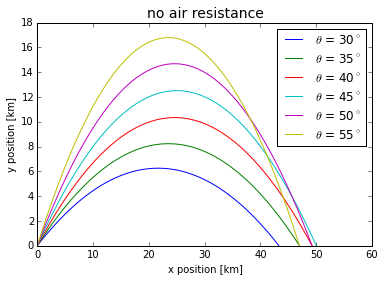

In [17]:
# Solution to problem 3 a): no air resistance
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

v_init = 700  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2500
angles = np.array([30, 35, 40, 45, 50, 55])

t = np.arange(0,nsteps*dt,dt)


plt.figure()

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                  # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        vel[i+1,:] = vel[i,:] + accel*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=0)]         # Only keep the positive ones, way better than what I was trying to do!
    r_show = r_show / 1000
    plt.plot(r_show[:,0],r_show[:,1],label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')
    print('the max range for theta = '+str(theta)+' is '+str(r_show[len(r_show)-1,0])+' km')
    print('the max height for theta = '+str(theta)+' is '+str(max(r_show[:,1]))+' km')
    

plt.title('no air resistance', size = 14)
plt.xlabel('x position [km]')
plt.ylabel('y position [km]')
plt.ylim(0,18)
plt.xlim(0,60)
plt.legend()    
plt.show()
   

The max heights and ranges match those given in the figure.

the max range for theta = 30 is 21.280412364 km
the max height for theta = 30 is 4.10830558382 km
the max range for theta = 35 is 21.922786493 km
the max height for theta = 35 is 5.20418664172 km
the max range for theta = 40 is 22.054759895 km
the max height for theta = 40 is 6.32925226511 km
the max range for theta = 45 is 21.6977902904 km
the max height for theta = 45 is 7.45681241998 km
the max range for theta = 50 is 20.8848449846 km
the max height for theta = 50 is 8.5612336579 km
the max range for theta = 55 is 19.6271103203 km
the max height for theta = 55 is 9.6176069321 km


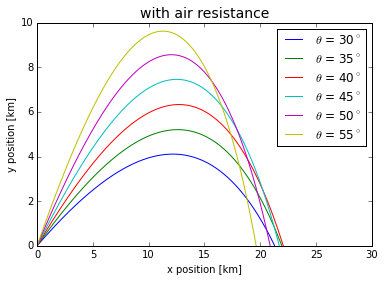

In [19]:
# Solution to problem 3 b): include air resistance
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

v_init = 700  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
angles = np.array([30, 35, 40, 45, 50, 55])
bperm = 4e-5

t = np.arange(0,nsteps*dt,dt)


plt.figure()

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                            # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel[i,0]**2+vel[i,1]**2)    # magnitude of the velocity at that point
        vel[i+1,:] = vel[i,:] + accel*dt - bperm*v*vel[i,:]*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=0)]         # Only keep the positive ones, way better than what I was trying to do!
    r_show = r_show / 1000
    plt.plot(r_show[:,0],r_show[:,1],label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')
    print('the max range for theta = '+str(theta)+' is '+str(r_show[len(r_show)-1,0])+' km')
    print('the max height for theta = '+str(theta)+' is '+str(max(r_show[:,1]))+' km')
    
plt.title('with air resistance', size = 14)
plt.xlabel('x position [km]')
plt.ylabel('y position [km]')
plt.ylim(0,10)
plt.xlim(0,30)
plt.legend()    
plt.show()
 

Once again, the results here match the figure given well.

---

** Problem 4: Cannon Shells, variable air density**

For cannon shells, their trajectories take them into more rarified air, where the drag will be less.  If we assume a constant-temperature model, then we have

$$
\rho = \rho_0\exp(-y/y_0)
$$ 

where $\rho_0\approx 1.275\rm\ kg\ m^{-3}$ is the density of air at sea level, and $y_0\approx10^4$ m is the density scale height.

Assuming a constant temperature with height isn't the best approximation, and we might instead opt to use the adiabatic approximation

$$
\rho = \rho_0\left({1-\frac{ay}{T_0}}\right)^\alpha
$$

where $a\approx6.5\times10^{-3}$ K/m, $\alpha\approx2.5$ for air, and $T_0$ is the sea level temperature (in K).  Whichever you use, the drag force is proportional to density, so

$$
F^*_{drag} = \frac{\rho}{\rho_0}F_{drag}(y=0)
$$

Calculate the trajectory of our cannon shell including both air drag and the reduced air density at high altitudes so that you can reproduce the results in the figure below.  Perform your calculation for different firing angles and determine the value that gives the maximum range.

* Undergraduates: Choose whichever density formula you like
* Graduate students: Do both and plot together

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/cannon2.png" />


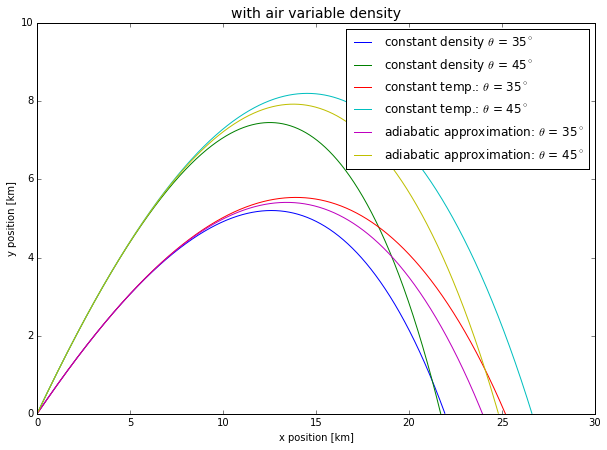

In [3]:
# Solution to problem 4
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

v_init = 700  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 1700
angles = np.array([35, 45])
bperm = 4e-5   # 1/m

# constants specific to variable density
rho_0 = 1.275  # kg/m^3
y_0 = 1.0e4      # m
a = 6.5e-3     # K/m
alpha = 2.5
T_0 = 273.0     # K the temp at sea level is room temp?

plt.figure(figsize = (10,7))

for theta in angles:
    # no corrections
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                            # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel[i,0]**2+vel[i,1]**2)    # magnitude of the velocity at that point
        vel[i+1,:] = vel[i,:] + accel*dt - bperm*v*vel[i,:]*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=0)]
    r_show = r_show / 1000
    plt.plot(r_show[:,0],r_show[:,1],label = r'constant density $\theta $ = '+str(theta)+r'$^{\circ}$')

for theta in angles:
    # first do calculations for the constant temperature model
    # the only difference between this and 3 b is the extra factor in the drag force
    r1 = np.zeros((nsteps,2))
    r1[0,:] = [0,0]                            # starts from (0,0)
    vel1 = np.zeros((nsteps,2))
    vel1[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel1[i,0]**2+vel1[i,1]**2)    # magnitude of the velocity at that point
        vel1[i+1,:] = vel1[i,:] + accel*dt - np.exp(-r1[i,1]/y_0)*bperm*v*vel1[i,:]*dt
        r1[i+1,:] = r1[i,:] + vel1[i,:]*dt
    r1_show = r1[(r1[:,1]>=0)]
    r1_show = r1_show / 1000
    plt.plot(r1_show[:,0],r1_show[:,1],label = r'constant temp.: $\theta $ = '+str(theta)+r'$^{\circ}$')

    
for theta in angles:
    # now do calculations for the adiabatic approximation
    # the only difference here is the extra factor in the drag force
    r2 = np.zeros((nsteps,2))
    r2[0,:] = [0,0]                            # starts from (0,0)
    vel2 = np.zeros((nsteps,2))
    vel2[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel2[i,0]**2+vel2[i,1]**2)    # magnitude of the velocity at that point
        vel2[i+1,:] = vel2[i,:] + accel*dt - (1.0-a*r2[i,1]/T_0)**alpha*bperm*v*vel2[i,:]*dt
        r2[i+1,:] = r2[i,:] + vel2[i,:]*dt
    r2_show = r2[(r2[:,1]>=0)]
    r2_show = r2_show / 1000
    plt.plot(r2_show[:,0],r2_show[:,1],label = r'adiabatic approximation: $\theta $ = '+str(theta)+r'$^{\circ}$')


plt.title('with air variable density', size = 14)
plt.xlabel('x position [km]')
plt.ylabel('y position [km]')
plt.ylim(0,10)
plt.xlim(0,30)
plt.legend()    
plt.show()

--- 

**Problem G1: (Graduate students)**

In warfare you generally want to hit a particular target.  This is not trivial, since very small changes in any of the parameters can lead to large changes in the landing site of the shell.  Investigate this by calculating how much the range of the cannon shell would change if the initial speed is increased by 1 percent.  Also computer the change in the range if there is a slight (10 km/h) wind (see next problem).  You should find that even these relatively small changes alter the landing site by quite significant amounts.



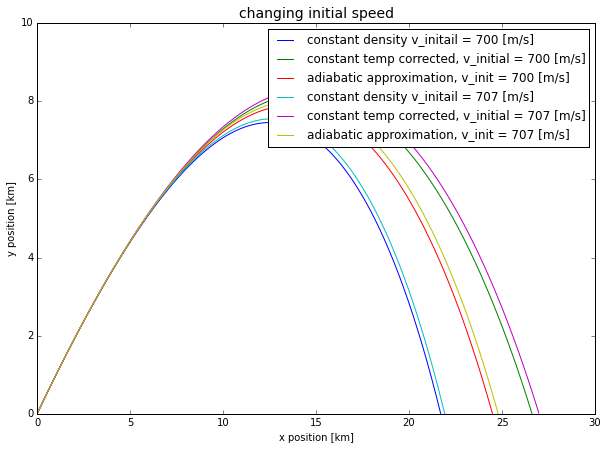

the change in range for constant density is  0.216096114595  km

the change in range for a constant temperature correction is  0.374371750079  km

the change in range for the adiabatic approximation is  0.301650035254  km



In [4]:
# Solution to problem G1
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
import math as math

v_0 = np.array([700, 707])  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
theta = 45
bperm = 4e-5   # 1/m

theta = 45

# constants specific to variable density
rho_0 = 1.275  # kg/m^3
y_0 = 1.0e4      # m
a = 6.5e-3     # K/m
alpha = 2.5
T_0 = 273.0     # K the temp at sea level is room temp?

# to store the max values
max_range_constant_temp = np.zeros(len(v_0))
max_range_no_corrections = np.zeros(len(v_0))
max_range_adiabatic = np.zeros(len(v_0))

plt.figure(figsize = (10,7))

for j in range(len(v_0)):
    v_init = v_0[j]
    r0 = np.zeros((nsteps,2))
    r1 = np.zeros((nsteps,2))
    r2 = np.zeros((nsteps,2))
    r0[0,:] = [0,0]                            # starts from (0,0)
    r1[0,:] = [0,0]
    r2[0,:] = [0,0]
    vel0 = np.zeros((nsteps,2))
    vel1 = np.zeros((nsteps,2))
    vel2 = np.zeros((nsteps,2))
    vel0[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    vel1[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
    vel2[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
    for i in range(nsteps - 1):
        # update the non-density corrected trajectory
        v0 = np.sqrt(vel0[i,0]**2+vel0[i,1]**2)    # magnitude of the velocity at that point
        vel0[i+1,:] = vel0[i,:] + accel*dt - bperm*v0*vel0[i,:]*dt
        r0[i+1,:] = r0[i,:] + vel0[i,:]*dt
        #update the constant temp corrected trajectory
        v1 = np.sqrt(vel1[i,0]**2+vel1[i,1]**2)
        vel1[i+1,:] = vel1[i,:] + accel*dt - np.exp(-r1[i,1]/y_0)*bperm*v1*vel1[i,:]*dt
        r1[i+1,:] = r1[i,:] + vel1[i,:]*dt
        # update the adiabatic trajectory
        v2 = np.sqrt(vel1[i,0]**2+vel1[i,1]**2)
        vel2[i+1,:] = vel2[i,:] + accel*dt - (1.0-a*r2[i,1]/T_0)**alpha*bperm*v2*vel2[i,:]*dt
        r2[i+1,:] = r2[i,:] + vel2[i,:]*dt
        
    # only keep the positive values    
    r0_show = r0[(r0[:,1]>=0)]     
    r1_show = r1[(r1[:,1]>=0)]
    r2_show = r2[(r2[:,1]>=0)]
    # convert to km
    r0_show = r0_show/1000
    r1_show = r1_show/1000
    r2_show = r2_show/1000
    # store the max ranges
    max_range_constant_temp[j] = r1_show[len(r1_show)-1,0]
    max_range_no_corrections[j] = r0_show[len(r0_show)-1,0]
    max_range_adiabatic[j] = r2_show[len(r2_show)-1,0]
    # plot the data
    plt.plot(r0_show[:,0],r0_show[:,1],label = 'constant density v_initail = '+str(v_init)+' [m/s]')
    plt.plot(r1_show[:,0],r1_show[:,1],label = 'constant temp corrected, v_initial = '+str(v_init)+' [m/s]')
    plt.plot(r2_show[:,0],r2_show[:,1],label = 'adiabatic approximation, v_init = '+str(v_init)+' [m/s]')
    
plt.title('changing initial speed', size = 14)
plt.xlabel('x position [km]')
plt.ylabel('y position [km]')
plt.ylim(0,10)
plt.xlim(0,30)
plt.legend()    
plt.show()

# calculate the change in range
print('the change in range for constant density is ',max_range_no_corrections[1]-max_range_no_corrections[0], ' km')
print()
print('the change in range for a constant temperature correction is ', max_range_constant_temp[1]-max_range_constant_temp[0], ' km')
print()
print('the change in range for the adiabatic approximation is ', max_range_adiabatic[1]-max_range_adiabatic[0], ' km')
print()

As can be seen in the figure above, increasing the initial velocity by as little as 1% can change the range by several hundred meters. This could be very bad if say a hospital was near the intentended target.

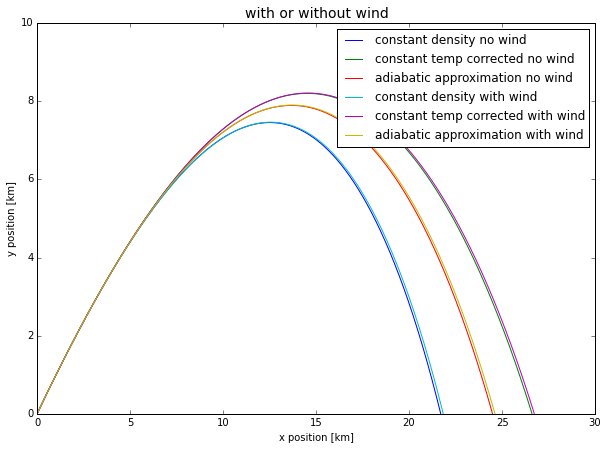

the change in range for constant density is  0.135402229999  km

the change in range for a constant temperature correction is  0.124934216348  km

the change in range for the adiabatic approximation is  0.132269579533  km



In [6]:

# Solution to G1 b) with wind
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
import math as math

v_init = 700  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
theta = 45
bperm = 4e-5   # 1/m
v_wind = np.array([10,0])
v_wind = v_wind*1000/3600     # convert from kilometers per hour to meters per second
theta = 45

# constants specific to variable density
rho_0 = 1.275  # kg/m^3
y_0 = 1.0e4      # m
a = 6.5e-3     # K/m
alpha = 2.5
T_0 = 273.0     # K the temp at sea level is room temp?

# to store the max values
max_range_constant_temp = np.zeros(2)
max_range_no_corrections = np.zeros(2)
max_range_adiabatic = np.zeros(2)

plt.figure(figsize = (10,7))

# no wind
r0 = np.zeros((nsteps,2))
r1 = np.zeros((nsteps,2))
r2 = np.zeros((nsteps,2))
r0[0,:] = [0,0]                            # starts from (0,0)
r1[0,:] = [0,0]
r2[0,:] = [0,0]
vel0 = np.zeros((nsteps,2))
vel1 = np.zeros((nsteps,2))
vel2 = np.zeros((nsteps,2))
vel0[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
vel1[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
vel2[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
for i in range(nsteps - 1):
    # update the non-density corrected trajectory
    v0 = np.sqrt(vel0[i,0]**2+vel0[i,1]**2)    # magnitude of the velocity at that point
    vel0[i+1,:] = vel0[i,:] + accel*dt - bperm*v0*vel0[i,:]*dt
    r0[i+1,:] = r0[i,:] + vel0[i,:]*dt
    #update the constant temp corrected trajectory
    v1 = np.sqrt(vel1[i,0]**2+vel1[i,1]**2)
    vel1[i+1,:] = vel1[i,:] + accel*dt - np.exp(-r1[i,1]/y_0)*bperm*v1*vel1[i,:]*dt
    r1[i+1,:] = r1[i,:] + vel1[i,:]*dt
    # update the adiabatic trajectory
    v2 = np.sqrt(vel1[i,0]**2+vel1[i,1]**2)
    vel2[i+1,:] = vel2[i,:] + accel*dt - (1.0-a*r2[i,1]/T_0)**alpha*bperm*v2*vel2[i,:]*dt
    r2[i+1,:] = r2[i,:] + vel2[i,:]*dt
# only keep the positive values
r0_show = r0[(r0[:,1]>=0)]
r1_show = r1[(r1[:,1]>=0)]
r2_show = r2[(r2[:,1]>=0)]
# convert to km
r0_show = r0_show/1000
r1_show = r1_show/1000
r2_show = r2_show/1000
# plot the data
plt.plot(r0_show[:,0],r0_show[:,1],label = 'constant density no wind')
plt.plot(r1_show[:,0],r1_show[:,1],label = 'constant temp corrected no wind')
plt.plot(r2_show[:,0],r2_show[:,1],label = 'adiabatic approximation no wind')
# save the max values
max_range_no_corrections[0] = r0_show[len(r0_show)-1,0]
max_range_constant_temp[0] = r1_show[len(r1_show)-1,0]
max_range_adiabatic[0] = r2_show[len(r2_show)-1,0]

# with wind

r0 = np.zeros((nsteps,2))
r1 = np.zeros((nsteps,2))
r2 = np.zeros((nsteps,2))
r0[0,:] = [0,0]                            # starts from (0,0)
r1[0,:] = [0,0]
r2[0,:] = [0,0]
vel0 = np.zeros((nsteps,2))
vel1 = np.zeros((nsteps,2))
vel2 = np.zeros((nsteps,2))
vel0[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
vel1[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
vel2[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]
for i in range(nsteps - 1):
    # update the non-density corrected trajectory
    v0 = np.sqrt((vel0[i,0]-v_wind[0])**2+(vel0[i,1]-v_wind[1])**2)    # magnitude of the velocity at that point
    vel0[i+1,:] = vel0[i,:] + accel*dt - bperm*v0*(vel0[i,:]-v_wind)*dt
    r0[i+1,:] = r0[i,:] + vel0[i,:]*dt
    #update the constant temp corrected trajectory
    v1 = np.sqrt((vel1[i,0]-v_wind[0])**2+(vel1[i,1]-v_wind[1])**2)
    vel1[i+1,:] = vel1[i,:] + accel*dt - np.exp(-r1[i,1]/y_0)*bperm*v1*(vel1[i,:]-v_wind)*dt
    r1[i+1,:] = r1[i,:] + vel1[i,:]*dt
    # update the adiabatic trajectory
    v2 = np.sqrt((vel1[i,0]-v_wind[0])**2+(vel1[i,1]-v_wind[1])**2)
    vel2[i+1,:] = vel2[i,:] + accel*dt - (1.0-a*r2[i,1]/T_0)**alpha*bperm*v2*(vel2[i,:]-v_wind)*dt
    r2[i+1,:] = r2[i,:] + vel2[i,:]*dt
# only keep the positive values
r0_show = r0[(r0[:,1]>=0)]
r1_show = r1[(r1[:,1]>=0)]
r2_show = r2[(r2[:,1]>=0)]
# convert to km
r0_show = r0_show/1000
r1_show = r1_show/1000
r2_show = r2_show/1000
# plot the data
plt.plot(r0_show[:,0],r0_show[:,1],label = 'constant density with wind')
plt.plot(r1_show[:,0],r1_show[:,1],label = 'constant temp corrected with wind')
plt.plot(r2_show[:,0],r2_show[:,1],label = 'adiabatic approximation with wind')
# save the max values
max_range_no_corrections[1] = r0_show[len(r0_show)-1,0]
max_range_constant_temp[1] = r1_show[len(r1_show)-1,0]
max_range_adiabatic[1] = r2_show[len(r2_show)-1,0]

plt.title('with or without wind', size = 14)
plt.xlabel('x position [km]')
plt.ylabel('y position [km]')
plt.ylim(0,10)
plt.xlim(0,30)
plt.legend()    
plt.show()

# calculate the differences
print('the change in range for constant density is ',max_range_no_corrections[1]-max_range_no_corrections[0], ' km')
print()
print('the change in range for a constant temperature correction is ', max_range_constant_temp[1]-max_range_constant_temp[0], ' km')
print()
print('the change in range for the adiabatic approximation is ', max_range_adiabatic[1]-max_range_adiabatic[0], ' km')
print()

Adding the corrections for a small wind also causes a change of a hundred meters or so in the range of the projectile.

---  

**Problem 5: Baseball - motion of a batted ball**

The drag coefficient $C$ is a complicated function as shown in the figure.  The drag factor for a normal baseball can be approximated by the function

$$
\frac{B_2}{m} = 0.0039 + \frac{0.0058}{1+\exp[(v-v_d)/\Delta]}
$$

with $v_d = 35$ m/s and $\Delta = 5$ m/s.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-drag-coef.png" />

In a vacuum, a typical batted ball ($v_0 = 50$ m/s, $\theta=45^\circ$) would fly over 800 feet before landing.  

If we assume the wind is blowing horizontally (along $x$) with a constant magnitude and direction, then the components of the drag force become

\begin{align}
F_{drag,x} &= -B_2|\vec v - \vec v_{wind}|(v_x - v_{wind})\\
F_{drag,y} &= -B_2|\vec v - \vec v_{wind}| v_y
\end{align}

Modify your previous cannon shell program to include velocity dependent drag force and the effect of wind.  Typical results are shown in the figure below. 

(a) Calculate the range at seal level, with no wind, of a ball hit at 110 mph (49 m/s) for different initial angles.  Determine to within $1^\circ$ the angle that gives the maximum range.

(b) Determine the initial angles that give the maximum range for a ball hit at 110 mph into a 25-mph head wind, and with a 24-mph tail wind.  What are the maximum ranges in the two cases?

(c) Calculate how much a fastball slows down on it's way to home plate.  Assume a pitch that leaves the pitchers hand at 100 mph and find its speed when it crosses home plate, which is 60.5 feet away.

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/baseball-batted.png" />
---


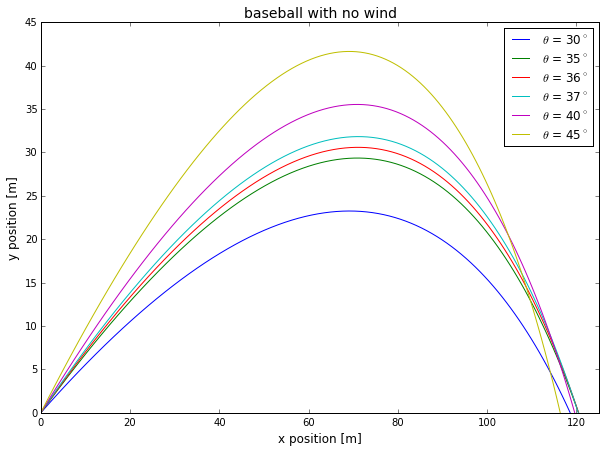

the max range is  120.562596475  at an angle of  36


In [9]:
# Solution to problem 5 a)
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def bperm(v):
    vd = 35.      # m/s
    Delta = 5.    # m/s
    bpm = 0.0039 + 0.0058/(1 + np.exp((v-vd)/Delta))
    return bpm

# for the max values
max_angle = 0
max_range = 0
# for the trajectory
v_init = 49  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
angles = np.array([30, 35, 36, 37, 40, 45])

t = np.arange(0,nsteps*dt,dt)

plt.figure(figsize = (10,7))

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                            # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel[i,0]**2+vel[i,1]**2)    # magnitude of the velocity at that point
        vel[i+1,:] = vel[i,:] + accel*dt - bperm(v)*v*vel[i,:]*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=-1)]
    plt.plot(r_show[:,0],r_show[:,1],label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')
    if r_show[len(r_show)-1,0] > max_range:
        max_range = r_show[len(r_show)-1,0]
        max_angle = theta
    
plt.title('baseball with no wind', size = 14)
plt.xlabel('x position [m]', size = 12)
plt.ylabel('y position [m]', size = 12)
plt.ylim(0,45)       # see the full arcs
plt.xlim(0,125)
#plt.ylim(0,7)        # zoom in to see the max distance
#plt.xlim(116,121)
plt.legend()    
plt.show()

print('the max range is ', max_range, ' [m], at an angle of ', max_angle)

Solution to 5 a)

When the x and y limits of the graph are "zoomed in" it can be seen that an angle of $\theta = 36 ^{\circ }$ gives the maximum distance. However, angles of $\theta = 35 ^{\circ } $ and $\theta = 37 ^{\circ } $ give results that are very close to the max.

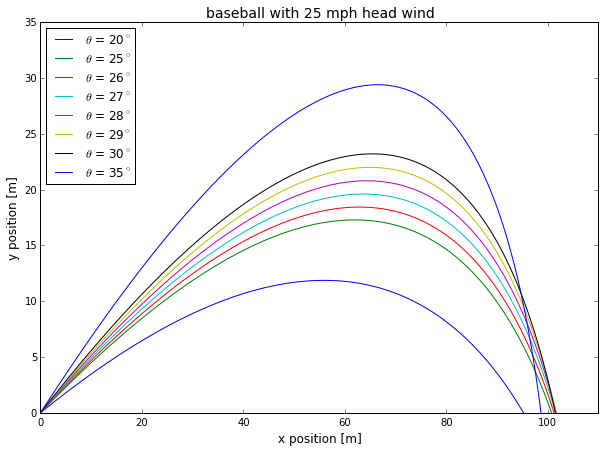

the max range is  102.146535988  [m], at an angle of  28


In [11]:
# Solution to problem 5 b)
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def bperm(v):
    vd = 35.      # m/s
    Delta = 5.    # m/s
    bpm = 0.0039 + 0.0058/(1 + np.exp((v-vd)/Delta))
    return bpm

# for the max values
max_angle = 0
max_range = 0
# for the trajectory
v_init = 49  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
angles = np.array([20, 25,26,27,28,29, 30, 35])
v_wind = np.array([-25.0, 0.0])
v_wind = v_wind*0.44704   # convert to m/s

t = np.arange(0,nsteps*dt,dt)

plt.figure(figsize = (10,7))

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                            # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        # do we need to take into account the difference in velocities?
        v = np.sqrt((vel[i,0]-v_wind[0])**2+(vel[i,1]-v_wind[1])**2)    # relative to wind
        #v = np.sqrt((vel[i,0])**2+(vel[i,1])**2)    # not relative to wind
        vel[i+1,:] = vel[i,:] + accel*dt - bperm(v)*v*(vel[i,:]-v_wind)*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=-1)]
    plt.plot(r_show[:,0],r_show[:,1],label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')
    if r_show[len(r_show)-1,0] > max_range:
        max_range = r_show[len(r_show)-1,0]
        max_angle = theta
    
plt.title('baseball with 25 mph head wind', size = 14)
plt.xlabel('x position [m]', size = 12)
plt.ylabel('y position [m]', size = 12)
plt.ylim(0,35)       # see the full arcs
plt.xlim(0,110)
#plt.ylim(0,7)        # zoom in to see the max distance
#plt.xlim(95,105)
plt.legend(loc = 'upper left')    
plt.show()

# print out the info about max range
print('the max range is ', max_range, ' [m], at an angle of ', max_angle)

For the headwind it can be seen that an agle of $\theta = 28 ^{\circ }$ yeilds the maximum range of about 101.5 m, but angles of $26^{\circ } $ to $30^{\circ }$ all yeild pretty similar ranges.

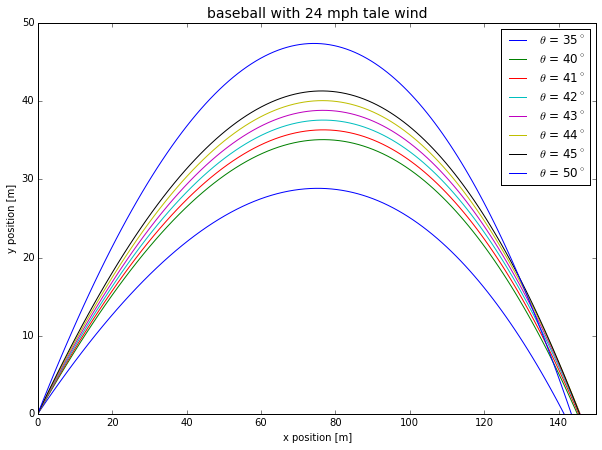

the max range is  146.475471957  [m], at an angle of  43


In [13]:
# Solution to problem 5 b)
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def bperm(v):
    vd = 35.      # m/s
    Delta = 5.    # m/s
    bpm = 0.0039 + 0.0058/(1 + np.exp((v-vd)/Delta))
    return bpm


# for the max values
max_angle = 0
max_range = 0
# for the trajectory
v_init = 49  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.05      # s
nsteps = 2000
angles = np.array([35, 40, 41, 42, 43, 44, 45, 50])
v_wind = np.array([24, 0])
v_wind = v_wind*0.44704   # convert to m/s


t = np.arange(0,nsteps*dt,dt)

plt.figure(figsize = (10,7))

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,0]                            # starts from (0,0)
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt((vel[i,0]-v_wind[0])**2+(vel[i,1]-v_wind[1])**2)    # magnitude of the velocity at that point
        vel[i+1,:] = vel[i,:] + accel*dt - bperm(v)*v*(vel[i,:]-v_wind)*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
    r_show = r[(r[:,1]>=-1)]
    plt.plot(r_show[:,0],r_show[:,1],label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')
    if r_show[len(r_show)-1,0] > max_range:
        max_range = r_show[len(r_show)-1,0]
        max_angle = theta
    
plt.title('baseball with 24 mph tale wind', size = 14)
plt.xlabel('x position [m]')
plt.ylabel('y position [m]')
plt.ylim(0,50)       # see the full arcs
plt.xlim(0,150)
#plt.ylim(0,4)        # zoom in to see the max distance
#plt.xlim(143,147)
plt.legend()    
plt.show()

# print out the info about max range
print('the max range is ', max_range, ' [m], at an angle of ', max_angle)

An angle of $\theta = 44 ^{\circ }$ yeilds the largest range with the tale wind of about 145.75 m. However $\theta = 41 ^{\circ }$ to $\theta = 45 ^{\circ} $ all yield similar ranges.

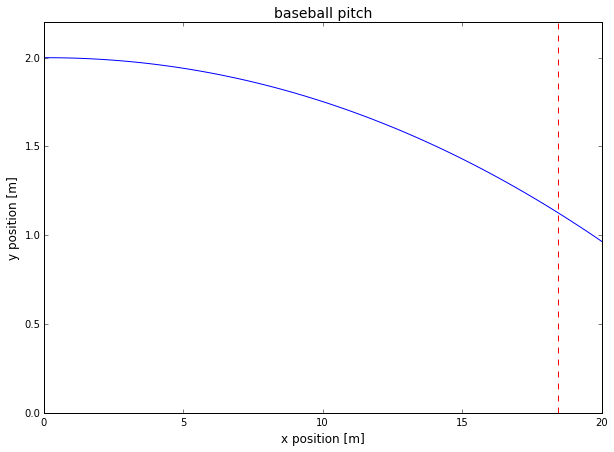

the speed the ball has when it crosses home plate is  91.7945559069 mph
it slows down  8.2054440931 mph


In [11]:
# Solution to problem 5 c)
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def bperm(v):
    vd = 35.      # m/s
    Delta = 5.    # m/s
    bpm = 0.0039 + 0.0058/(1 + np.exp((v-vd)/Delta))
    return bpm
    
v_init = 100*0.44704  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g])
dt = 0.005      # s
nsteps = 100
angles = np.array([0])   # pitcher throws the ball horizontally

t = np.arange(0,nsteps*dt,dt)

plt.figure(figsize = (10,7))

for theta in angles:
    r = np.zeros((nsteps,2))
    r[0,:] = [0,2]                            # I guessed at how hight the pitcher releases the ball
    vel = np.zeros((nsteps,2))
    vel[0,:] = [v_init*np.cos(math.radians(theta)),v_init*np.sin(math.radians(theta))]  # initial velocity
    for i in range(nsteps - 1):
        v = np.sqrt(vel[i,0]**2+vel[i,1]**2)    # magnitude of the velocity at that point
        vel[i+1,:] = vel[i,:] + accel*dt - bperm(v)*v*vel[i,:]*dt
        r[i+1,:] = r[i,:] + vel[i,:]*dt
        if np.abs(r[i,0]-18.4404)<0.1:
            v_cross = vel[i,:]            # store these values for later use
    plt.plot(r[:,0],r[:,1],label = 'theta = '+str(theta)+r'$^{\circ }$')

plt.axvline(18.4404, color = 'r', linestyle = '--')
plt.title('baseball pitch', size = 14)
plt.xlabel('x position [m]', size = 12)
plt.ylabel('y position [m]', size = 12)
plt.ylim(0,2.2)       # see the full arcs
plt.xlim(0,20)
#plt.ylim(0,7)        # zoom in to see the max distance
#plt.xlim(116,121)
#plt.legend()    
plt.show()

v_home = np.sqrt(v_cross[0]**2 + v_cross[1]**2)/0.44704
print('the speed the ball has when it crosses home plate is ', v_home, 'mph')
print('it slows down ', v_init/0.44704 - v_home, 'mph')

---

**Problem G2: Crosswind**

Consider the effect of a crosswind on the trajectory of a flyball.  How much will a wind of 10 mph directed at right angles to the initial velocity alter the place where one of the fly balls in the figure above?




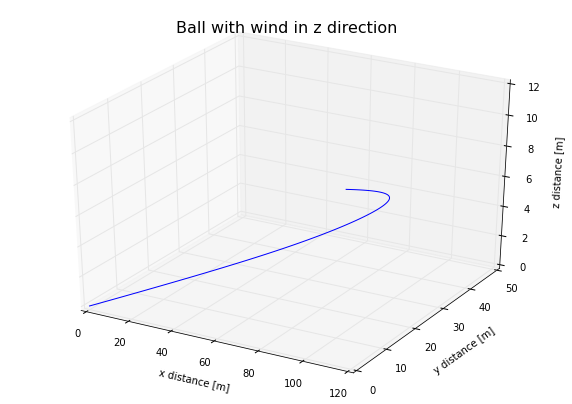

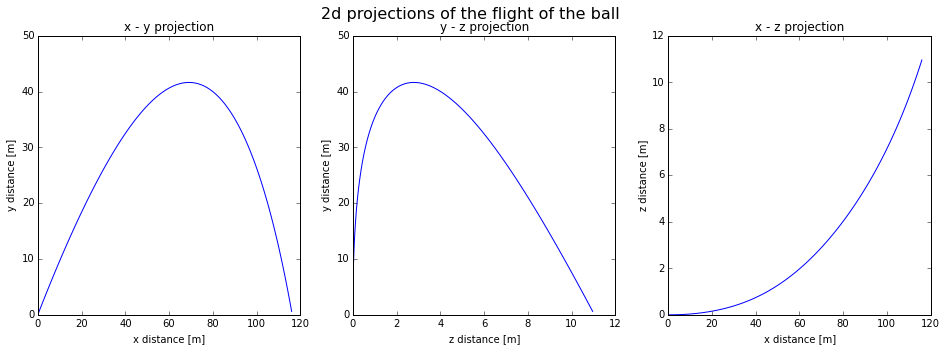

In [10]:
# Solution to problem G2
'''
James O. Thomas
September 2015
'''

import numpy as np
import matplotlib.pylab as plt
import math as math
from mpl_toolkits.mplot3d import Axes3D

def bperm(v):
    vd = 35.      # m/s
    Delta = 5.    # m/s
    bpm = 0.0039 + 0.0058/(1 + np.exp((v-vd)/Delta))
    return bpm

# define some constants
v_init = 49  # m/s
g = -9.8      # m/s^2
accel = np.array([0, g, 0])
dt = 0.05      # s
nsteps = 120
theta = 45
v_wind = np.array([0, 0,10])
v_wind = v_wind*0.44704   # convert to m/s

# initialize some arrays
t = np.arange(0,nsteps*dt,dt)
r = np.zeros((nsteps,3))
r[0,:] = [0,0,0]                            # starts from (0,0)
vel = np.zeros((nsteps,3))
vel[0,:] = [v_init*np.cos(math.radians(theta)), v_init*np.sin(math.radians(theta)), 0]  # initial velocity

# do the calculations
for i in range(nsteps - 1):
    v = np.sqrt((vel[i,0]-v_wind[0])**2+(vel[i,1]-v_wind[1])**2+(vel[i,2]-v_wind[2])**2)    # magnitude of the velocity at that point
    vel[i+1,:] = vel[i,:] + accel*dt - bperm(v)*v*(vel[i,:]-v_wind)*dt
    r[i+1,:] = r[i,:] + vel[i,:]*dt

# keep only the above ground points
r_show = r[(r[:,1]>=0)]
    
# split up the r array into x, y, and z components
x = r_show[:,0]
y = r_show[:,1]
z = r_show[:,2]

# plot the data
# is there a way to force some white space?
# this works well in the interactive viewer, but not so much in the ipython notebook
fig = plt.figure(figsize = (10,7))
ax = fig.gca(projection = '3d')

ax.set_xlim3d(0,120)
ax.set_ylim3d(0,50)
ax.set_zlim3d(0,12)
ax.set_xlabel('x distance [m]')
ax.set_ylabel('y distance [m]')
ax.set_zlabel('z distance [m]')
ax.set_title('Ball with wind in z direction', size=16)
ax.plot(x,y,z)
plt.show()

print() # blank line for spacing

# the 2d projections are easier to understand in the ipython notebook

fig2 = plt.figure(figsize = (16,5))

ax1 = plt.subplot(131)
ax1.plot(x,y)
ax1.set_xlabel('x distance [m]')
ax1.set_ylabel('y distance [m]')
ax1.set_title('x - y projection')
ax1.set_xlim(0,120)
ax1.set_ylim(0,50)

ax2 = plt.subplot(132)
ax2.plot(z,y)
ax2.set_ylabel('y distance [m]')
ax2.set_xlabel('z distance [m]')
ax2.set_title('y - z projection')
ax2.set_ylim(0,50)
ax2.set_xlim(0,12)

ax3 = plt.subplot(133)
ax3.plot(x,z)
ax3.set_xlabel('x distance [m]')
ax3.set_ylabel('z distance [m]')
ax3.set_title('x - z projection')
ax3.set_xlim(0,120)
ax3.set_ylim(0,12)

plt.suptitle('2d projections of the flight of the ball', size = 16 )
plt.show()


---

**Problem 6: Golf Drive**

In golf, the backspin of the driven ball gives a magnus force that can be stronger than the gravitational force (the trajectory curves upward).   The equations of motion for the golf ball are then

\begin{align}
\frac{dv_x}{dt} &= -\frac{F_{drag,x}}{m} - \frac{S_0\omega v_y}{m}\\
\frac{dv_y}{dt} &= -\frac{F_{drag,y}}{m} + \frac{S_0\omega v_x}{m} -g
\end{align}

Again the drag for a golf ball is a function of velocity, with $C\approx 1/2$ at low velocities ($v\le 14$ m/s) and $C\approx 7.0/v$ ($v$ in m/s) at high velocities ($>14$ m/s).  Use

$$F_{drag} = -C\rho A v^2$$

For the Magnus force, estimate $S_0\omega/m\approx 0.25\rm\ s^{-1}$. 

Again use the Euler method to integrate the trajectory.  Assume an initial velocity of 70 m/s.   Show that the maximum range occurs for a 'firing angle' of $\sim$9$^\circ$.  Simulate extra backspin by increasing $S_0\omega/m$ by 50%, and no backspin by setting it to zero.  Finally, calculate the trajectory of a smooth ball by using the appropriate drag coefficient.  (in other words, try to recreate this figure)

<img src="https://computationalphysicswithpython.files.wordpress.com/2015/09/golf-drive.png" />

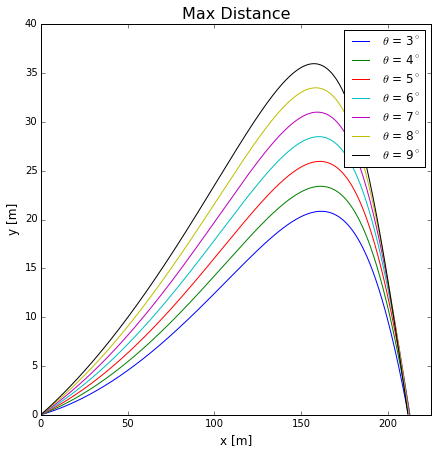

In [15]:
# Problem 6, max range
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def C(v):
    if v <= 14:
        return 0.5
    else:
        return 7./v
    
v_init = 70 # m/s
g = 9.8
dt = 0.01
nsteps = 1000
angles = np.array([3,4,5,6,7,8,9])
#angles = np.array([5, 10, 15, 20])
rho = 1.225
r_golfball = 42.7/2.            # mm for an American golfball
A = np.pi*(r_golfball/1000.)**2 # 1000 mm in 1 m, I'm an idiot
#print('A = ', A)
m = 45.93/1000.
#print('m = ', m)
magnus_constant = 0.25

plt.figure(figsize = (7,7))
# for the dimpled balls
for theta in angles:
    x = np.zeros(nsteps)    # I'm not sure how to do the magnus force with a single r or v array
    y = np.zeros(nsteps)
    x[0] = 0
    y[0] = 0
    v_x = np.zeros(nsteps)
    v_y = np.zeros(nsteps)
    v_x[0] = v_init*np.cos(math.radians(theta))
    v_y[0] = v_init*np.sin(math.radians(theta))
    for i in range(nsteps - 1):
        v = np.sqrt(v_x[i]**2+v_y[i]**2)    # magnitude of the velocity at that point
        v_x[i+1] = v_x[i] - C(v)*A*rho*v*v_x[i]*dt/m - magnus_constant*v_y[i]*dt
        v_y[i+1] = v_y[i] - g*dt - C(v)*A*rho*v*v_y[i]*dt/m + magnus_constant*v_x[i]*dt
        x[i+1] = x[i] + v_x[i]*dt
        y[i+1] = y[i] + v_y[i]*dt
    
    # only keep those points above ground
    x_show = x[(y[:]>=0)]
    y_show = y[(y[:]>=0)]
    plt.plot(x_show, y_show, label = r'$\theta $ = '+str(theta)+r'$^{\circ }$')

plt.legend()
plt.xlabel('x [m]', size = 12)
plt.ylabel('y [m]', size = 12)
plt.title('Max Distance', size = 16)
plt.ylim(0,40) # Show the whole thing
plt.xlim(0,225)
#plt.ylim(0,4) # zoom in on landing
#plt.xlim(210,215)
plt.show()

Using the code above we can see that the maximum range occurs for a launch angle $\theta \approx 6 ^\circ$. However, angles between $3 ^\circ$ and $9^\circ$ all have ranges of within a meter or so.

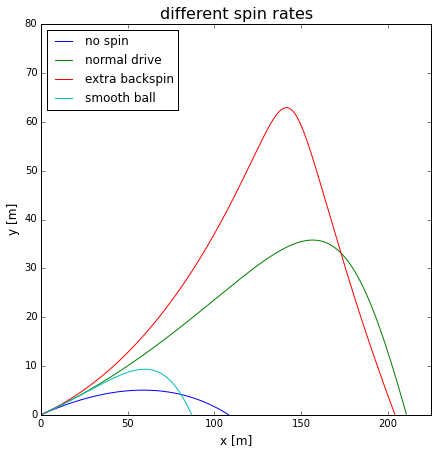

In [3]:
# Problem 6, different spin rates
'''
James O. Thomas
September 2015
'''
import numpy as np
import matplotlib.pylab as plt
import math as math

def C(v):
    if v <= 14:
        return 0.5
    else:
        return 7./v
    
v_init = 70 # m/s
g = 9.81
dt = 0.01
nsteps = 1100
theta = 9
rho = 1.225
r_golfball = 42.7/2.            # mm for an American golfball
A = np.pi*(r_golfball/1000.)**2 # 1000 mm in 1 m, I'm an idiot
#print('A = ', A)
m = 45.93/1000.
#print('m = ', m)
swpm = np.array([0, 0.25, 0.25*1.5])

plt.figure(figsize = (7,7))
for magnus_constant in swpm:
    x = np.zeros(nsteps)    # I'm not sure how to do the magnus force with a single r or v array
    y = np.zeros(nsteps)
    x[0] = 0
    y[0] = 0
    v_x = np.zeros(nsteps)
    v_y = np.zeros(nsteps)
    v_x[0] = v_init*np.cos(math.radians(theta))
    v_y[0] = v_init*np.sin(math.radians(theta))
    for i in range(nsteps - 1):
        v = np.sqrt(v_x[i]**2+v_y[i]**2)    # magnitude of the velocity at that point
        v_x[i+1] = v_x[i] - C(v)*A*rho*v*v_x[i]*dt/m - magnus_constant*v_y[i]*dt
        v_y[i+1] = v_y[i] - g*dt - C(v)*A*rho*v*v_y[i]*dt/m + magnus_constant*v_x[i]*dt
        x[i+1] = x[i] + v_x[i+1]*dt
        y[i+1] = y[i] + v_y[i+1]*dt
    # only keep the above ground points
    x_show = x[(y[:]>=0)]
    y_show = y[(y[:]>=0)]
    # plot with the appropriate labels
    if magnus_constant == 0:
        plt.plot(x_show, y_show, label = 'no spin')
    elif magnus_constant == 0.25:
        plt.plot(x_show, y_show, label = 'normal drive')
    else:
        plt.plot(x_show, y_show, label = 'extra backspin')
        
# now the smooth ball
C_smooth = 0.55
magnus_smooth = 0.25
x = np.zeros(nsteps)    # I'm not sure how to do the magnus force with a single, 2d, r or v array
y = np.zeros(nsteps)
x[0] = 0
y[0] = 0
v_x = np.zeros(nsteps)
v_y = np.zeros(nsteps)
v_x[0] = v_init*np.cos(math.radians(theta))
v_y[0] = v_init*np.sin(math.radians(theta))
for i in range(nsteps - 1):
    v = np.sqrt(v_x[i]**2+v_y[i]**2)    # magnitude of the velocity at that point
    v_x[i+1] = v_x[i] - C_smooth*A*rho*v*v_x[i]*dt/m - magnus_smooth*v_y[i]*dt
    v_y[i+1] = v_y[i] - g*dt - C_smooth*A*rho*v*v_y[i]*dt/m + magnus_smooth*v_x[i]*dt
    x[i+1] = x[i] + v_x[i]*dt
    y[i+1] = y[i] + v_y[i]*dt
x_show = x[(y[:]>=0)]
y_show = y[(y[:]>=0)]
plt.plot(x, y, label = 'smooth ball')
    
plt.legend(loc = 'upper left')
plt.xlabel('x [m]', size = 12)
plt.ylabel('y [m]', size = 12)
plt.title('different spin rates', size = 16)
plt.ylim(0,80) 
plt.xlim(0,225)
plt.show()

To recreate the given figure I used a constant $C = 0.55$ for the smooth ball. This recreated the data reasonably well. It may be more physically correct to use a changing $C$ as a function of $v$ for the smooth ball as a function of the ball speed, but I would still have wound up "eye balling" the fit and therefore the more complicated model would probably not have yeilded more accurate results.